## EDA of walmart data 

In [1]:
# EDA of capstone 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("../DataWrangle/Data_wrangle_cap3_walmartdata.csv")


In [4]:
df.head()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,log_weekly_sales
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,10.123647
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,10.737277
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,10.635773
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,9.873262
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,9.990990


In [5]:
df.shape

(421570, 17)

In [6]:
df.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday', 'type', 'size',
       'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3',
       'markdown4', 'markdown5', 'cpi', 'unemployment', 'log_weekly_sales'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   store             421570 non-null  int64  
 1   dept              421570 non-null  int64  
 2   date              421570 non-null  object 
 3   weekly_sales      421570 non-null  float64
 4   isholiday         421570 non-null  bool   
 5   type              421570 non-null  object 
 6   size              421570 non-null  int64  
 7   temperature       421570 non-null  float64
 8   fuel_price        421570 non-null  float64
 9   markdown1         421570 non-null  float64
 10  markdown2         421570 non-null  float64
 11  markdown3         421570 non-null  float64
 12  markdown4         421570 non-null  float64
 13  markdown5         421570 non-null  float64
 14  cpi               421570 non-null  float64
 15  unemployment      421570 non-null  float64
 16  log_weekly_sales  42

## negative temperature reaches as low as -2.06°F, and MarkDown2 and MarkDown3 contain negative value ? 

In [8]:
df.describe()

,store,dept,weekly_sales,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,log_weekly_sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,420345.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,8.525838
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,2.026034
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,7.657699
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,8.943547
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,9.916762
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,13.448930


* Weekly sales show negative values (possible returns), temperature reaches as low as -2.06°F, and MarkDown2 and MarkDown3 contain negative values, indicating potential data quality issues

In [9]:
df_cat = df.select_dtypes(include=['category','object','bool'])

In [10]:
df_cat.columns

Index(['date', 'isholiday', 'type'], dtype='object')

In [11]:
df_cat.shape

(421570, 3)

In [12]:
df_num = df.select_dtypes(include ='number')

In [13]:
df_num.columns

Index(['store', 'dept', 'weekly_sales', 'size', 'temperature', 'fuel_price',
       'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'cpi',
       'unemployment', 'log_weekly_sales'],
      dtype='object')

In [14]:
df_num.shape

(421570, 14)

## heatmap of numerical feature

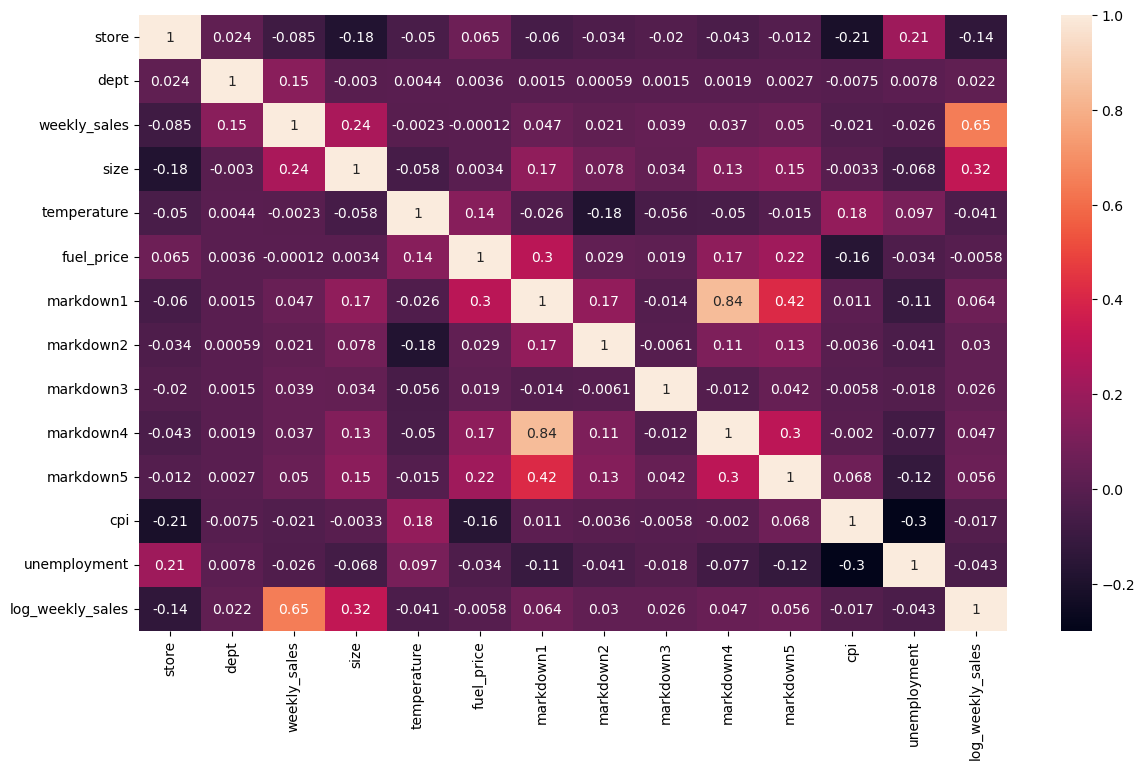

In [15]:
# heatmap 
plt.subplots(figsize=(14,8))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

*  Store size shows a positive correlation with weekly sales (r = 0.24), indicating that larger stores tend to generate higher sales.
* Markdown1 and Markdown5 have a moderate positive correlation (r = 0.42), suggesting that these discount variables move together.
* Markdown4 and Markdown5 also show a moderate positive correlation (r = 0.30).
* Department and weekly sales have a weak positive correlation (r = 0.15), indicating limited linear relationship.
* Weekly sales have very weak negative correlations with CPI (-0.021), unemployment (-0.026), and fuel price (-0.0001), implying minimal direct linear impact.

## scatter plot of numerical feature against weekly price

In [16]:
def scatterplots(columns, ncol=None, figsize=(18,15 )):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = df_num[col], y = 'weekly_sales', data=df_num, alpha=0.5)
        ax.set(xlabel=col, ylabel='weekly_sales')

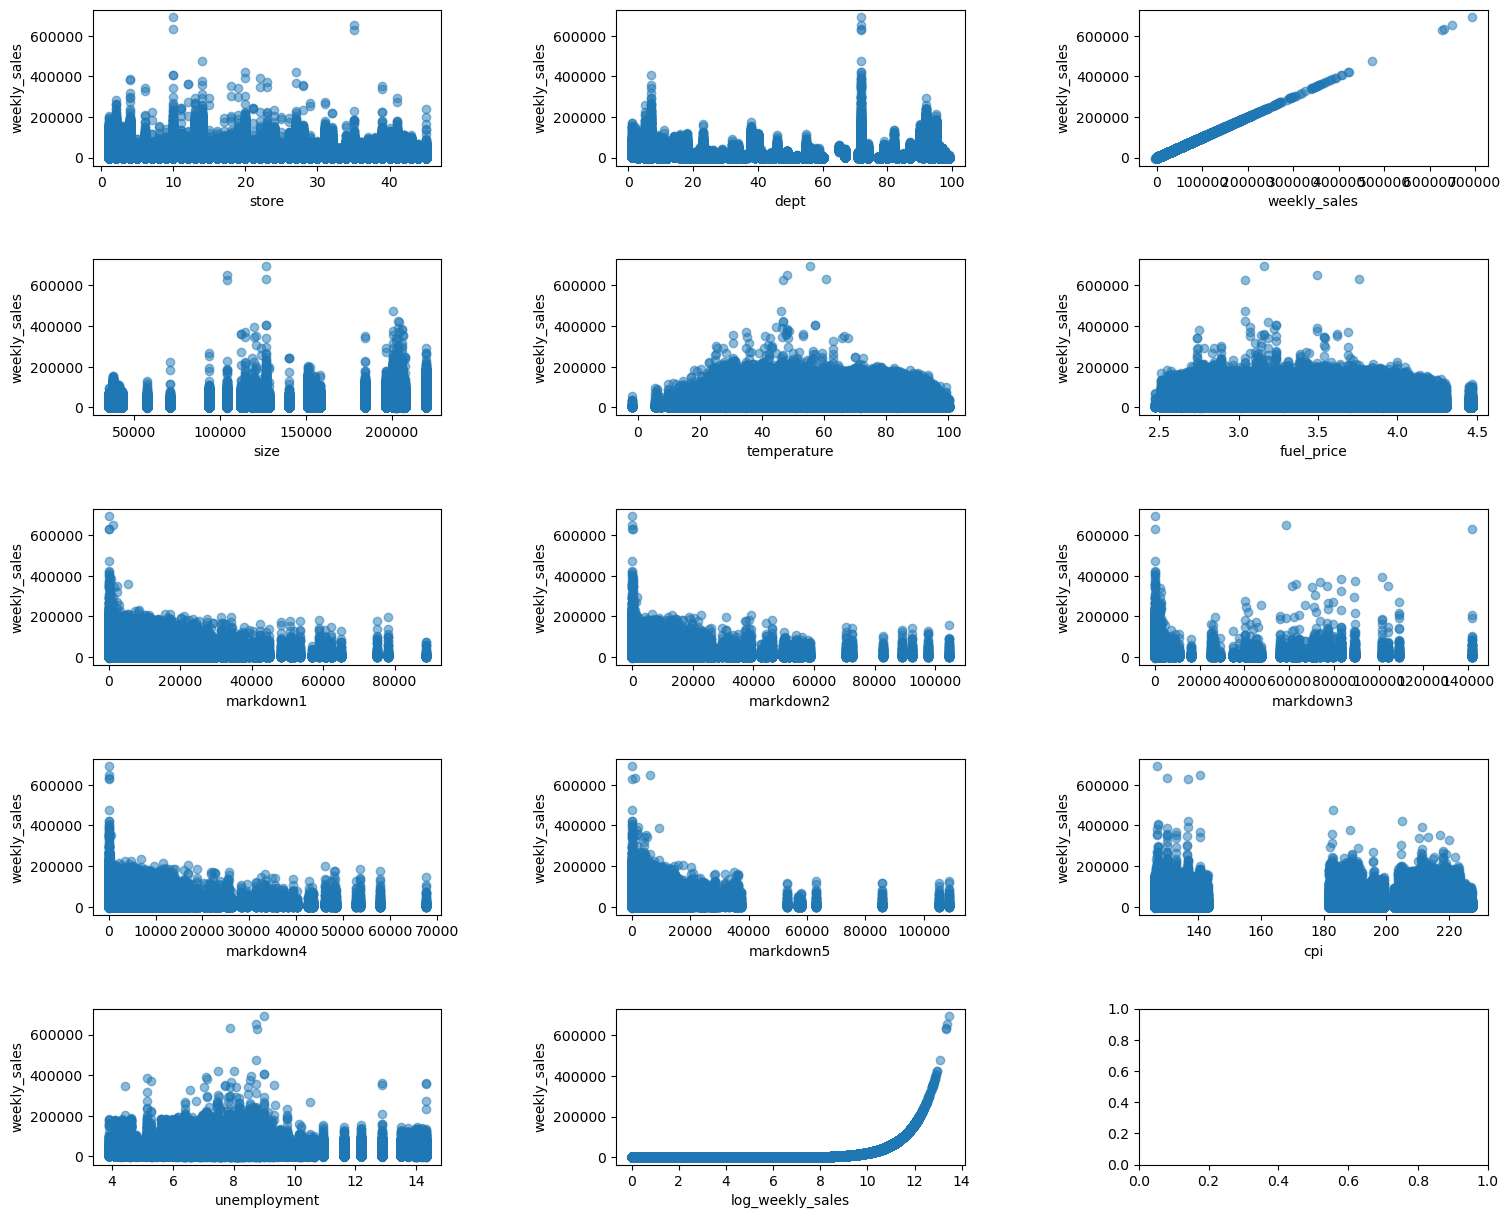

In [17]:
scatterplots(df_num.columns,ncol=3)
plt.show()


* Department: Certain departments consistently show higher sales, but no smooth linear trend.

* Size: Larger store sizes tend to have higher weekly sales, indicating a weak positive relationship.

* Temperature: Weekly sales peak at moderate temperatures, showing a non-linear (inverted-U) pattern.

* Fuel price: No strong or consistent relationship with weekly sales.

* Markdown1, Markdown2, Markdown4, Markdown5: Higher markdown values are mostly associated with lower sales levels, suggesting a weak negative relationship.

* CPI: Weekly sales appear largely independent of CPI levels.

* Unemployment: No strong linear relationship; Weekly sales are highest when unemployment is in the mid range (5–9).


###  Target feature analysis

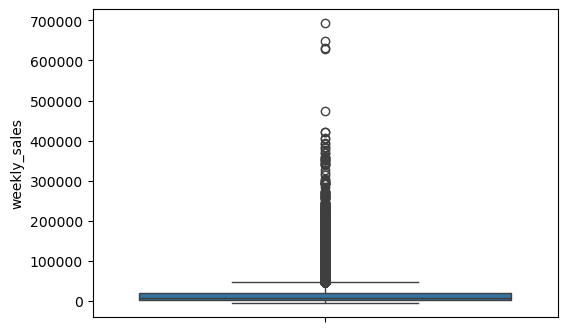

In [18]:
plt.subplots(figsize=(6, 4))
sns.boxplot(df['weekly_sales'])
plt.show()

* Weekly sales contain extreme outliers, by applying a log transformation reduces variance and the influence of these extreme values.

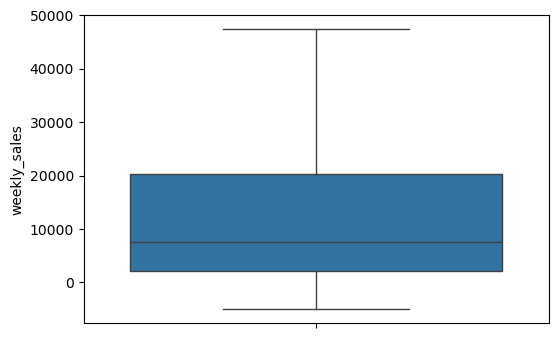

In [19]:
# boxplot of weekly sales without outliers
plt.subplots(figsize=(6, 4))
sns.boxplot( df['weekly_sales'],showfliers = False)
plt.show()

* Weekly sales have a median of ~8K with wide dispersion, negative lower values, and high upper extremes up to ~48K.

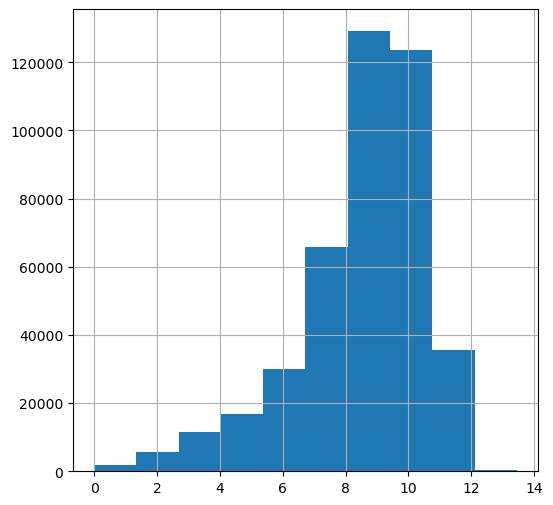

In [20]:
# X-axis shows log(1 + weekly_sales):# x ≈ 8  → ~3K, x ≈ 10 → ~22K sales, x ≈ 12 → ~163K sales x=14 ~1.2M
# Log scale compresses extreme sales values and reduces skewness.
df['log_weekly_sales'].hist(figsize=(6,6))
plt.show()

## categorical feature analysis 

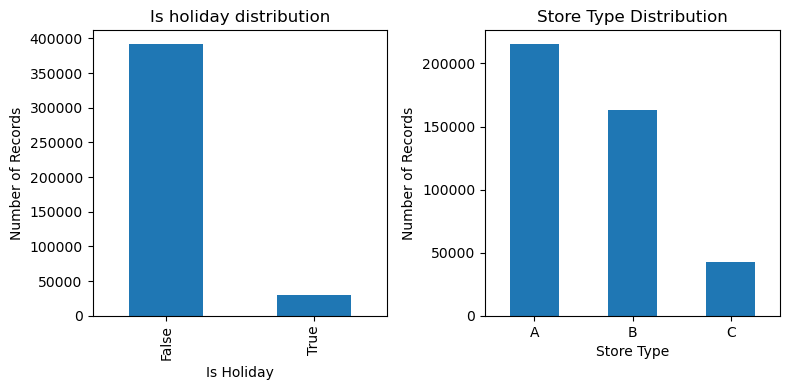

In [21]:
fig,axes = plt.subplots(1,2,figsize=(8,4))
df['isholiday'].value_counts().plot(kind='bar',ax=axes[0])
axes[0].set_title('Is holiday distribution')
axes[0].set_xlabel('Is Holiday')
axes[0].set_ylabel('Number of Records')
df['type'].value_counts().plot( kind='bar',ax=axes[1])
axes[1].set_title('Store Type Distribution')
axes[1].set_xlabel('Store Type')
axes[1].set_ylabel('Number of Records')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

* IsHoliday: less records correspond to holiday weeks
* Store Type: Store type A has the highest number of records, followed by B, while C is the least represented

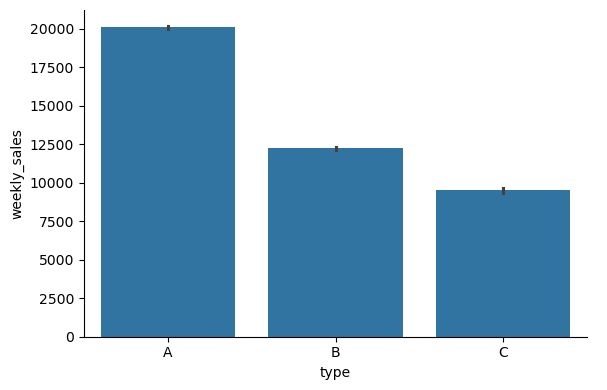

In [22]:
# plotting type and weekly sales
#fig,axes = plt.subplots(1,2,figsize=(8,4)),# height in inches, # width = height × aspect)

sns.catplot(data = df , x= 'type',y='weekly_sales',kind='bar',height=4, aspect=1.5 )  
plt.show()

* Average weekly sales are highest for Store Type A, followed by Type B, with Type C having the lowest sales.

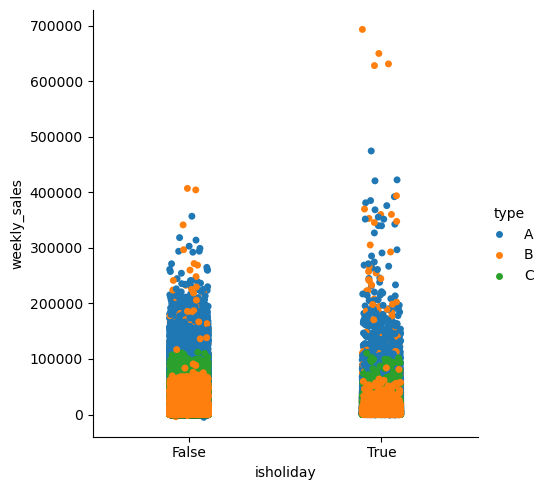

In [23]:
# is holiday vs weekly sales comparing across store types
# catplot is a wrapper around multiple categorical plots.like bar,box,violin,strip,swarm.
#sns.catplot(x='isholiday', y='weekly_sales', kind='box', data=df)
sns.catplot(data = df, x= 'isholiday',y='weekly_sales',jitter=True,hue="type")
plt.show()

* weekly sales are generally higher and more dispersed during holidays weeks compare to nonholiday weeks, speially for store type A and B.

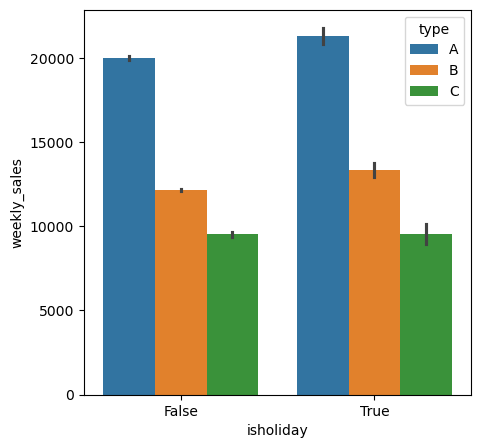

In [24]:
#Bar plot = aggregated values, Mean / sum / count of a numeric variable Per category, here Average weekly sales on holiday vs non-holiday
#A grouped bar chart comparing average weekly sales across store types, split by holiday vs non-holiday weeks
plt.figure(figsize =(5,5))
sns.barplot(x='isholiday', y='weekly_sales', data=df,hue='type')
plt.show()

* Average weekly sales increase during holiday weeks for all store types, with Store Type A consistently having the highest sales.

## Numerical feature analysis

In [25]:
df_num.columns

Index(['store', 'dept', 'weekly_sales', 'size', 'temperature', 'fuel_price',
       'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'cpi',
       'unemployment', 'log_weekly_sales'],
      dtype='object')

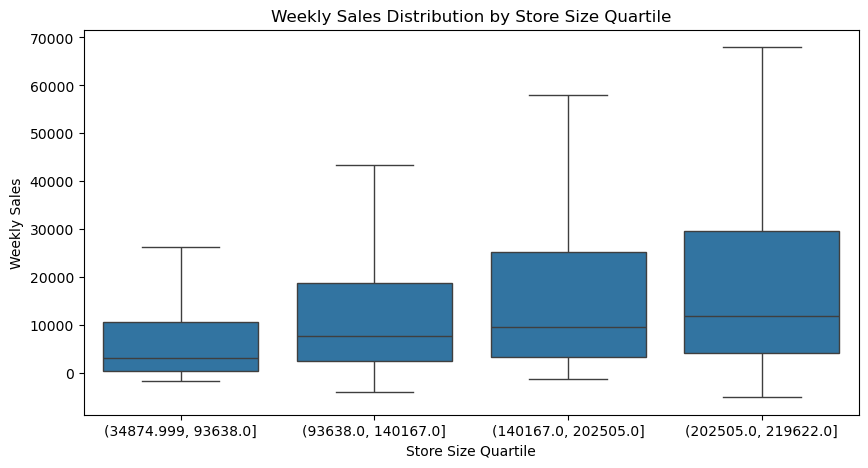

In [26]:
# weekly sales distribution by store size quartile
plt.figure(figsize=(10,5))
size_bin = pd.qcut(df_num['size'], 4)

sns.boxplot(x=size_bin,y=df_num['weekly_sales'],showfliers=False)

plt.title('Weekly Sales Distribution by Store Size Quartile')
plt.xlabel('Store Size Quartile')
plt.ylabel('Weekly Sales')
plt.show()

* Weekly sales increase with store size, with median sales rising from ~$2K (smallest stores) to ~$10K (largest stores).
* Larger stores show much greater variability in weekly sales, with some weeks reaching $60K-$70K, indicating less predictable performance.
* Smaller stores show more stable but limited sales performance with a lower upper bound of 27K.
* Significant overlap exists in weekly sales distributions across store sizes, indicating that size alone does not fully explain sales performance.

In [27]:
def boxplot(columns, ncol=3, figsize=(12, 12)):
    nrows = int(np.ceil(len(columns) / ncol))
    
    fig, axes = plt.subplots(nrows, ncol, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        axes[i].boxplot(df_num[col],vert=True)
        axes[i].set_title(col)
        axes[i].set_ylabel('Value')
    
    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    fig.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()

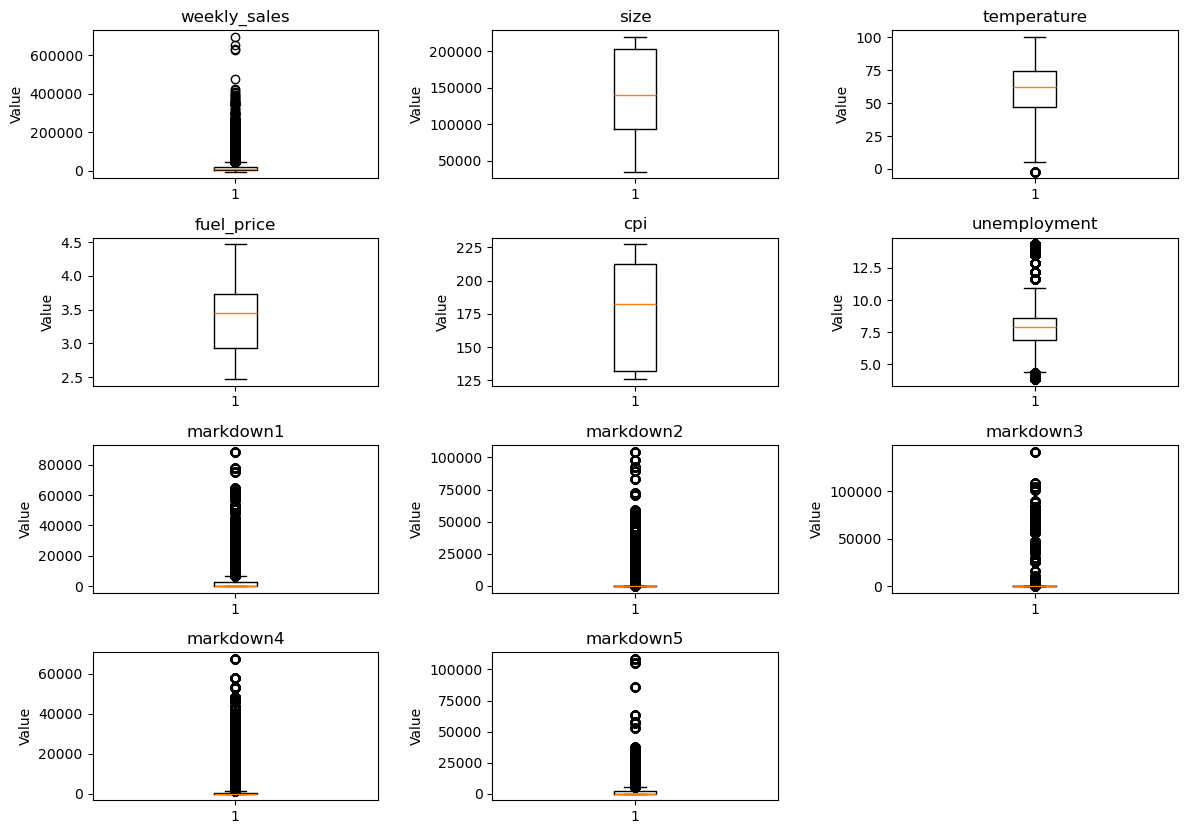

In [28]:
num_cols = ['weekly_sales','size','temperature','fuel_price','cpi','unemployment','markdown1','markdown2','markdown3','markdown4','markdown5']
boxplot(num_cols, ncol=3, figsize=(14, 10))

* Weekly sales and markdown variables show strong right skewness with many outliers
* size, temperature, fuel price, CPI, and unemployment exhibit more stable distributions with comparatively fewer extreme values.

## Correlation Between Numerical Features and Target

In [29]:
df_num.corr()['weekly_sales'].sort_values(ascending=False)

weekly_sales        1.000000
log_weekly_sales    0.649055
size                0.243828
dept                0.148032
markdown5           0.050465
markdown1           0.047172
markdown3           0.038562
markdown4           0.037467
markdown2           0.020716
fuel_price         -0.000120
temperature        -0.002312
cpi                -0.020921
unemployment       -0.025864
store              -0.085195
Name: weekly_sales, dtype: float64

### droped log_weekly_sales column from df_num and df 

In [30]:
df_num = df_num.drop(columns ='log_weekly_sales')

In [31]:
df_num.columns

Index(['store', 'dept', 'weekly_sales', 'size', 'temperature', 'fuel_price',
       'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'cpi',
       'unemployment'],
      dtype='object')

In [32]:
df.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday', 'type', 'size',
       'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3',
       'markdown4', 'markdown5', 'cpi', 'unemployment', 'log_weekly_sales'],
      dtype='object')

In [33]:
df = df.drop(columns ='log_weekly_sales')

In [34]:
df.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday', 'type', 'size',
       'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3',
       'markdown4', 'markdown5', 'cpi', 'unemployment'],
      dtype='object')

### Summary Statistics of Average Weekly Sales Across Stores

In [35]:
df.groupby('store')['weekly_sales'].mean().describe()


count       45.000000
mean     15438.091939
std       7011.232951
min       5053.415813
25%       9002.493073
50%      13803.596986
75%      19776.180881
max      29508.301592
Name: weekly_sales, dtype: float64

### Summary Statistics of Average Weekly Sales Across Depatment

In [36]:
df.groupby('dept')['weekly_sales'].mean().describe()

count       81.000000
mean     14031.701047
std      16435.893314
min         -7.682554
25%       2658.897010
50%       7440.680292
75%      19213.485088
max      75204.870531
Name: weekly_sales, dtype: float64

### Multivariate feature analysis

In [37]:
markdown_cols = ['markdown1','markdown2','markdown3','markdown4','markdown5']
df['has_promotion'] = (df[markdown_cols].sum(axis=1) > 0).astype(int)

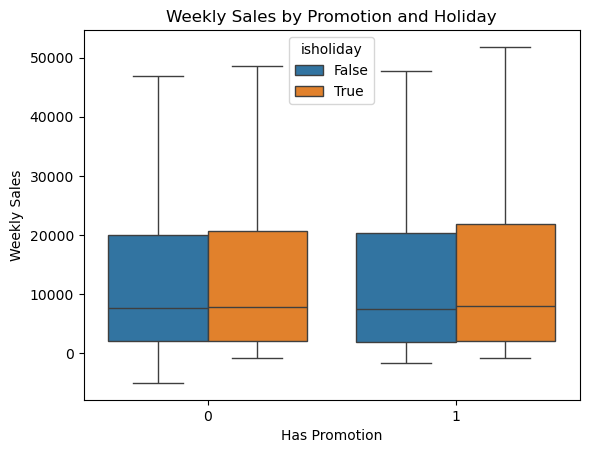

In [38]:
sns.boxplot(x='has_promotion',y='weekly_sales',hue='isholiday',data=df,showfliers=False)
plt.xlabel('Has Promotion')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Promotion and Holiday')
plt.show()

* Promotions and holidays do not consistently increase weekly sales but occasionally cause high sales spikes.

### Promotion Presence in Dataset

In [39]:
df['has_promotion'].value_counts(normalize=True)

has_promotion
0    0.64079
1    0.35921
Name: proportion, dtype: float64

in dataset we have almost 35% records which have promotion.

In [40]:
df['has_promotion']

0         0
1         0
2         0
3         0
4         0
         ..
421565    1
421566    1
421567    1
421568    1
421569    1
Name: has_promotion, Length: 421570, dtype: int64

### total promotion values 

In [41]:
df['promo_total_value'] = df[markdown_cols].sum(axis=1)

In [42]:
df['promo_total_value'].corr(df['weekly_sales'])

np.float64(0.06523650265818515)

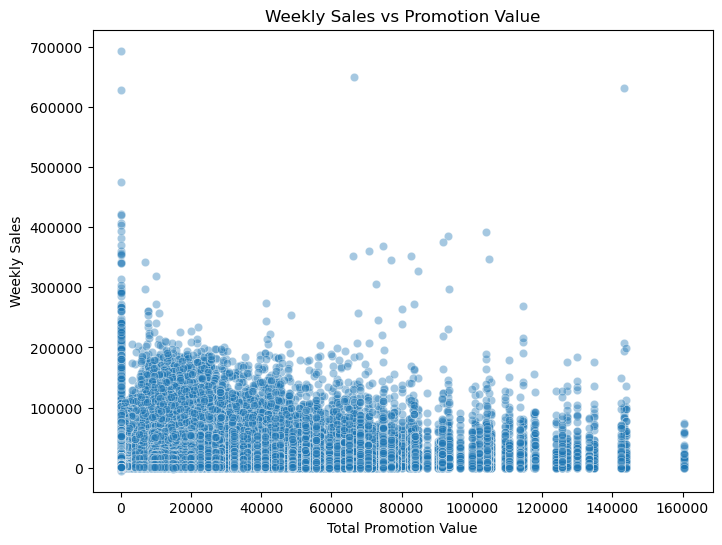

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='promo_total_value',
    y='weekly_sales',
    data=df,
    alpha=0.4
)

plt.xlabel('Total Promotion Value')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs Promotion Value')
plt.show()

* Weekly sales do not increase consistently with higher promotion values.

In [44]:
#df = df.drop(columns = 'promo_total_value')

In [45]:
#df.columns

## Hypothesis test

### 1. Impact of promotion on weekly sale 
* H0: There is no significant difference in average weekly sales between promotional and non-promotional periods.

* H1: There is a significant difference in average weekly sales between promotional and non-promotional periods. 

In [46]:
from scipy.stats import ttest_ind

sales_promo = df[df['has_promotion'] == 1]['weekly_sales']
sales_no_promo = df[df['has_promotion'] == 0]['weekly_sales']

t_stat, p_value = ttest_ind(sales_promo, sales_no_promo, equal_var=False)

t_stat, p_value

(np.float64(4.1479256392284665), np.float64(3.3559225628409e-05))

In [47]:
sales_promo.nunique()

138290

In [48]:
sales_no_promo.nunique()

236637

### Final statistical conclusion
* P<0.05
* we can Reject H₀ so Promotion has a statistically significant effect on average weekly sales

### 2. Impact of holidays on weekly sales 
* H0: There is no significant difference in average weekly sales between holidays and non-holidays periods.

* H1: There is a significant difference in average weekly sales between holidays and non-holidays periods 

In [49]:
from scipy.stats import ttest_ind

holiday_sales = df[df['isholiday'] == 1]['weekly_sales']
non_holiday_sales = df[df['isholiday'] == 0]['weekly_sales']

t_stat, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

t_stat, p_value

(np.float64(7.000740275222607), np.float64(2.5951250265739975e-12))

### Final statistical conclusion
* P<0.05
* we can Reject H₀ so Holidays has a statistically significant effect on average weekly sales.

## Chi square test (categorical vs categorical)
### check whether promotion and holiday related
* H0: Promotion and Holiday are independent (no relationship)
* H1: Promotion and Holiday are dependent (there is a relationship)

In [50]:
df.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday', 'type', 'size',
       'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3',
       'markdown4', 'markdown5', 'cpi', 'unemployment', 'has_promotion',
       'promo_total_value'],
      dtype='object')

In [51]:
## Create Crosstab (Observed Frequencies)
table = pd.crosstab(df['isholiday'],df['has_promotion'])
table

has_promotion,0,1
isholiday,,
False,252468,139441
True,17670,11991


In [52]:
#Run Chi-Square Test,#DOF = (rows − 1) × (columns − 1)
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("degree of freedom",dof)
print("expected value if both variable are independent",expected)

Chi-square statistic: 281.21395610412833
P-value: 4.083721153330174e-63
degree of freedom 1
expected value if both variable are independent [[251131.51657376 140777.48342624]
 [ 19006.48342624  10654.51657376]]


* as p< 0.5 so Reject the null hypothesis
* Promotion occurrence is strongly associated with holidays.
* Promotions are not randomly distributed across holiday and non-holiday weeks.

In [55]:
df.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday', 'type', 'size',
       'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3',
       'markdown4', 'markdown5', 'cpi', 'unemployment', 'has_promotion',
       'promo_total_value'],
      dtype='object')

In [58]:
df = df.drop(columns = ['promo_total_value','has_promotion'])

In [59]:
df.columns

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday', 'type', 'size',
       'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3',
       'markdown4', 'markdown5', 'cpi', 'unemployment'],
      dtype='object')

In [60]:
df.to_csv("data_eda_cap3.csv",index=False)

In [61]:
df.to_pickle("data_eda_pickle.pkl")

question: do i need to do more eda ?

## Conclusion
* Weekly sales are highly right-skewed with extreme values, indicating the presence of outliers and non-normal distribution.

* Linear correlation between most numerical features and weekly sales is weak, suggesting limited linear relationships.

* Weekly sales generally increase with store size, with larger stores exhibiting higher median sales and greater variability, though substantial  overlap exists across size groups.
* Significant overlap exists in weekly sales distributions across store sizes, indicating that size alone does not fully explain sales performance.

* Markdown features exhibit heavy-tailed distributions with extreme outliers and high missingness, reflecting episodic promotional activity.

* Holiday weeks show higher upper-tail sales, though average sales overlap with non-holiday periods.

* Macro-economic variables (temperature, fuel price, CPI, unemployment) show relatively stable distributions with limited direct impact on sales individually.

* EDA to modelling decision

* Skewed target distribution : Apply log transformation to weekly_sales to stabilize variance.

* Weak linear correlations : Prefer non-linear, tree-based models (Random Forest, XGBoost, LightGBM) over linear regression.

* Store and department are identifiers : we can treat as categorical features and apply appropriate encoding strategies. 

* Overlapping distributions across features Allow models to learn feature interactions rather than relying on single-feature effects.

* Markdown features contained a large proportion of missing values, which likely indicate weeks with no promotional activity. These missing values were replaced with zero to explicitly represent the absence of markdowns.

* Promotions are present in ~36% of observations

* Promotions are significantly more likely to occur during holidays.

In [63]:
df.head()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


## plot total weekly sales vs date

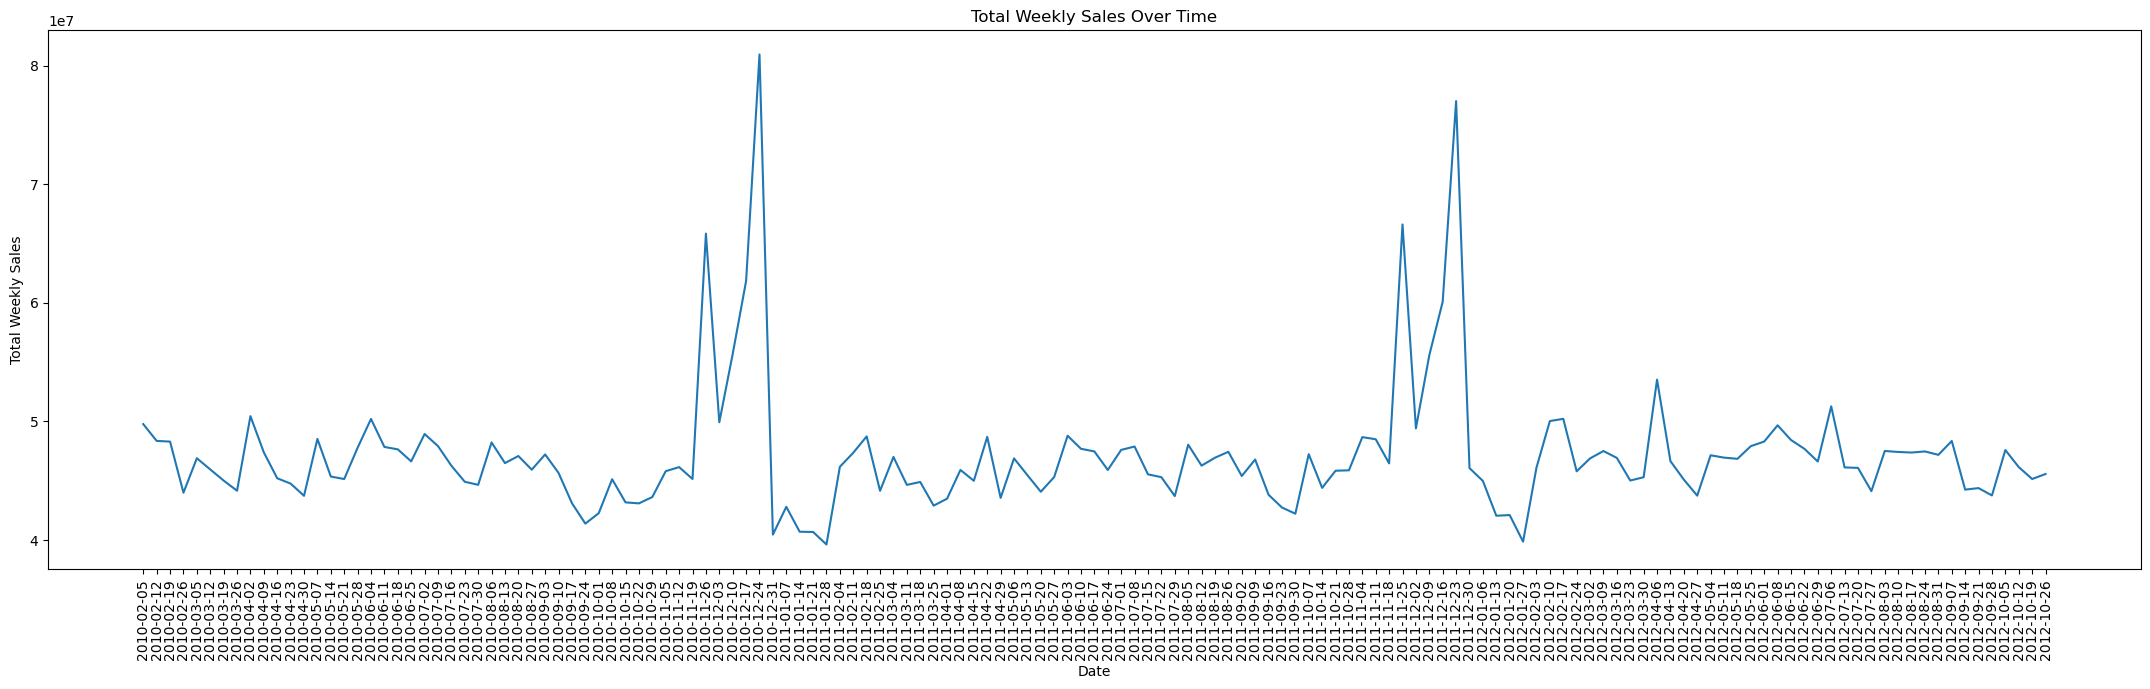

In [72]:
ts = (df.groupby('date', as_index=False)['weekly_sales'].sum().sort_values('date'))
plt.figure(figsize=(27,7))
plt.plot(ts['date'], ts['weekly_sales'])
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales Over Time')
plt.xticks(rotation =90)
plt.show()


## checked autocorelation over time ;
* Does today’s sales depend on previous weeks
  

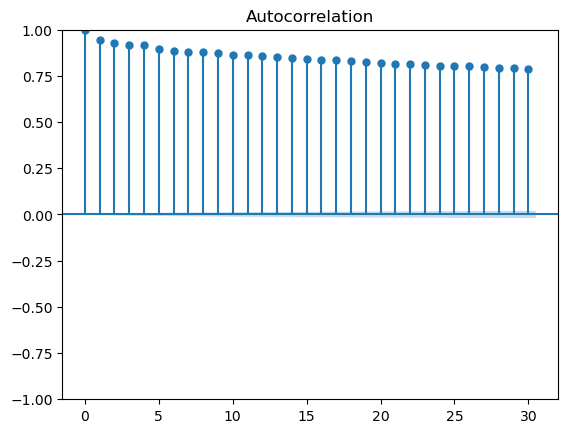

In [75]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['weekly_sales'], lags=30)
plt.show()
# results shows there is coraltion but for clear view check the weekly sales group by date 

In [77]:
ts.shape

(143, 2)

In [80]:
ts.columns

Index(['date', 'weekly_sales'], dtype='object')

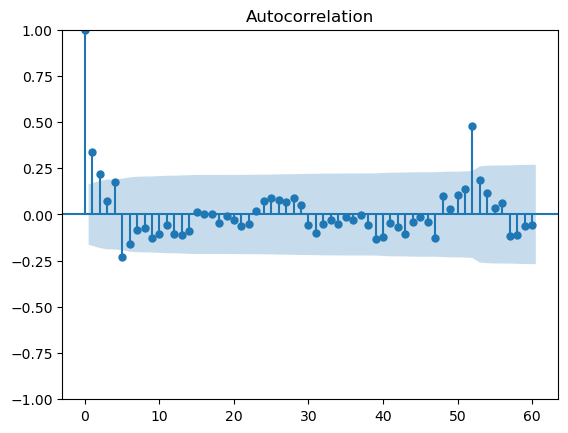

In [76]:

plot_acf(ts['weekly_sales'], lags=60)
plt.show()

In [81]:
# The ACF plot shows significant short-term autocorrelation (lags 1–3) and a strong spike at lag 52, indicating annual seasonality. 
# This confirms that weekly sales are time-dependent and seasonally driven.